In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
%matplotlib inline


def sum_of_square(vec_a, vec_b):
    diff = vec_a - vec_b
    diff_squared = np.square(diff)
    return (np.sum(diff_squared))

df = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\gfs_bom_loc_1.csv")


In [2]:
# Setting UtcTime as the index
df.set_index("Unnamed: 0", inplace=True)

In [3]:
# Dropping variables that are not used for training
df = df.drop('index',axis=1)
df = df.drop('ObservationId',axis=1)
df = df.drop('Timestamp',axis=1)
df = df.drop('ParentLocationId',axis=1)
df = df.drop('RelatedLocationId',axis=1)
df = df.drop('ReadingId',axis=1)
df = df.drop('LocalTime',axis=1)
df = df.drop('TimeZone',axis=1)
df = df.drop('WindDirection',axis=1)
df = df.drop('WindDirectionCompass',axis=1)

# Dropping more variables 
df = df.drop('FeelsLike',axis=1)
df = df.drop('DewPoint',axis=1)
df = df.drop('RelativeHumidity',axis=1)
df = df.drop('Pressure',axis=1)


df = df.drop('WindSpeed',axis=1)
df = df.drop('WindGust',axis=1)
df = df.drop('RainSince9am',axis=1)
df = df.drop('RainfallLastHour',axis=1)
df = df.drop('RainfallLast10Minutes',axis=1)
df = df.drop('pred_cloud_cover',axis=1)
df = df.drop('pred_dewp',axis=1)
df = df.drop('pred_lw_rad',axis=1)
df = df.drop('pred_merid_wind',axis=1)
df = df.drop('pred_pe',axis=1)
df = df.drop('pred_rain_rate',axis=1)
df = df.drop('pred_soil_moisture_lower',axis=1)
df = df.drop('pred_soil_moisture_upper',axis=1)
df = df.drop('pred_sunshine',axis=1)
df = df.drop('pred_surface_pressure',axis=1)
df = df.drop('pred_sw_rad',axis=1)
# df = df.drop('pred_temp',axis=1)
df = df.drop('pred_zonal_wind',axis=1)





# Change units 
df.pred_temp = df.pred_temp - 273.15 # Kelvin to Celsius
# df.pred_dewp = df.pred_dewp - 273.15 # Kelvin to Celsius


In [4]:
# If you want to remove some features, 
# Initially, just select the following variables
# df

In [5]:
print df.columns
print 'Total number of columns = %d' %(len(df.columns))

Index([u'Temperature', u'pred_temp'], dtype='object')
Total number of columns = 2


In [6]:
# Generate df for gt label (Y)
df_gt_output = pd.DataFrame(df.Temperature)

# Rename dataframe for data matrix (X)
df_data = df

In [7]:
# Add temp for the next 7-days
for hrs in range(1,169):
    col_name = 'y_t_'+str(hrs)
    df_gt_output[col_name] = df_gt_output.Temperature.shift(-hrs)
    # print col_name

# Now remove the current temperature from this dataframe
df_gt_output = df_gt_output.drop('Temperature', axis=1)

In [8]:
# df_data.columns
df.columns

Index([u'Temperature', u'pred_temp'], dtype='object')

In [9]:
# Get the observation from past two days
past_hours = 168

# BOM Temperature for the last 2-days
current_col = 'Temperature'
for hr in range(1,past_hours):
    col_name = current_col+'_past'+str(hr)+'hr'
    df_data[col_name] = df[current_col].shift(hr) # Include past values
    print col_name
    
# Add GFS forecasts into the input for the next 7-days
current_col = 'pred_temp'
for hrs in range(1,169):
    col_name = 'y_gfs_fcst_'+str(hrs)
    df_data[col_name] = df[current_col].shift(-hr) # Include Future Values from GFS
    print col_name

Temperature_past1hr
Temperature_past2hr
Temperature_past3hr
Temperature_past4hr
Temperature_past5hr
Temperature_past6hr
Temperature_past7hr
Temperature_past8hr
Temperature_past9hr
Temperature_past10hr
Temperature_past11hr
Temperature_past12hr
Temperature_past13hr
Temperature_past14hr
Temperature_past15hr
Temperature_past16hr
Temperature_past17hr
Temperature_past18hr
Temperature_past19hr
Temperature_past20hr
Temperature_past21hr
Temperature_past22hr
Temperature_past23hr
Temperature_past24hr
Temperature_past25hr
Temperature_past26hr
Temperature_past27hr
Temperature_past28hr
Temperature_past29hr
Temperature_past30hr
Temperature_past31hr
Temperature_past32hr
Temperature_past33hr
Temperature_past34hr
Temperature_past35hr
Temperature_past36hr
Temperature_past37hr
Temperature_past38hr
Temperature_past39hr
Temperature_past40hr
Temperature_past41hr
Temperature_past42hr
Temperature_past43hr
Temperature_past44hr
Temperature_past45hr
Temperature_past46hr
Temperature_past47hr
Temperature_past48hr
T

In [10]:
df_data

,Temperature,pred_temp,Temperature_past1hr,Temperature_past2hr,Temperature_past3hr,Temperature_past4hr,Temperature_past5hr,Temperature_past6hr,Temperature_past7hr,Temperature_past8hr,...,y_gfs_fcst_159,y_gfs_fcst_160,y_gfs_fcst_161,y_gfs_fcst_162,y_gfs_fcst_163,y_gfs_fcst_164,y_gfs_fcst_165,y_gfs_fcst_166,y_gfs_fcst_167,y_gfs_fcst_168
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-06-28 14:00:00,12.000000,10.216669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.483321,8.483321,8.483321,8.483321,8.483321,8.483321,8.483321,8.483321,8.483321,8.483321
2016-06-28 15:00:00,12.100000,10.350000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.316654,8.316654,8.316654,8.316654,8.316654,8.316654,8.316654,8.316654,8.316654,8.316654
2016-06-28 16:00:00,11.500000,10.283329,12.100000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,8.149988,8.149988,8.149988,8.149988,8.149988,8.149988,8.149988,8.149988,8.149988,8.149988
2016-06-28 17:00:00,11.700000,10.216659,11.500000,12.100000,12.000000,NaN,NaN,NaN,NaN,NaN,...,8.016656,8.016656,8.016656,8.016656,8.016656,8.016656,8.016656,8.016656,8.016656,8.016656
2016-06-28 18:00:00,10.900000,10.149988,11.700000,11.500000,12.100000,12.000000,NaN,NaN,NaN,NaN,...,7.883325,7.883325,7.883325,7.883325,7.883325,7.883325,7.883325,7.883325,7.883325,7.883325
2016-06-28 19:00:00,9.800000,10.016656,10.900000,11.700000,11.500000,12.100000,12.000000,NaN,NaN,NaN,...,7.749994,7.749994,7.749994,7.749994,7.749994,7.749994,7.749994,7.749994,7.749994,7.749994
2016-06-28 20:00:00,9.700000,9.883325,9.800000,10.900000,11.700000,11.500000,12.100000,12.000000,NaN,NaN,...,7.716659,7.716659,7.716659,7.716659,7.716659,7.716659,7.716659,7.716659,7.716659,7.716659
2016-06-28 21:00:00,9.300000,9.749994,9.700000,9.800000,10.900000,11.700000,11.500000,12.100000,12.000000,NaN,...,7.683323,7.683323,7.683323,7.683323,7.683323,7.683323,7.683323,7.683323,7.683323,7.683323
2016-06-28 22:00:00,10.400000,10.083327,9.300000,9.700000,9.800000,10.900000,11.700000,11.500000,12.100000,12.000000,...,7.649988,7.649988,7.649988,7.649988,7.649988,7.649988,7.649988,7.649988,7.649988,7.649988


In [11]:
# df_data.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_dfdata.csv")
# df_gt_output.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_df_gt_output.csv")


In [12]:
# df_data

In [13]:
# df_gt_output

In [11]:
len(df_data.columns)

337

In [12]:
tot_cols_df_data = len(df_data.columns)
# Combine data and temp forecast for the next seven days and filter nan
df_combined = pd.concat([df_data,df_gt_output], axis=1)
df_combined = df_combined.dropna()

# Get the list of column names
data_columns = df_combined.columns[0:tot_cols_df_data]
gt_temp_columns = df_combined.columns[tot_cols_df_data:]

# create new dataframe for data and forecast
df_data_nan_filtered = df_combined[data_columns]
df_gt_output_nan_filtered = df_combined[gt_temp_columns]


In [13]:
df_combined.columns[0:tot_cols_df_data]

Index([u'Temperature', u'pred_temp', u'Temperature_past1hr',
       u'Temperature_past2hr', u'Temperature_past3hr', u'Temperature_past4hr',
       u'Temperature_past5hr', u'Temperature_past6hr', u'Temperature_past7hr',
       u'Temperature_past8hr',
       ...
       u'y_gfs_fcst_159', u'y_gfs_fcst_160', u'y_gfs_fcst_161',
       u'y_gfs_fcst_162', u'y_gfs_fcst_163', u'y_gfs_fcst_164',
       u'y_gfs_fcst_165', u'y_gfs_fcst_166', u'y_gfs_fcst_167',
       u'y_gfs_fcst_168'],
      dtype='object', length=337)

In [14]:
# df_data_nan_filtered.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_dfdata.csv")
# df_gt_output_nan_filtered.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_df_gt_output.csv")


In [15]:
df_data_matrix = df_data_nan_filtered.as_matrix()
df_gt_temp_forecast_matrix = df_gt_output_nan_filtered.as_matrix()

In [16]:
print df_data_matrix.shape
print df_gt_temp_forecast_matrix.shape

(3836L, 337L)
(3836L, 168L)


In [17]:
df_data_nan_filtered

,Temperature,pred_temp,Temperature_past1hr,Temperature_past2hr,Temperature_past3hr,Temperature_past4hr,Temperature_past5hr,Temperature_past6hr,Temperature_past7hr,Temperature_past8hr,...,y_gfs_fcst_159,y_gfs_fcst_160,y_gfs_fcst_161,y_gfs_fcst_162,y_gfs_fcst_163,y_gfs_fcst_164,y_gfs_fcst_165,y_gfs_fcst_166,y_gfs_fcst_167,y_gfs_fcst_168
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-07-05 13:00:00,9.400000,8.483321,9.300000,9.600000,9.500000,9.800000,10.100000,10.300000,10.200000,11.200000,...,6.749994,6.749994,6.749994,6.749994,6.749994,6.749994,6.749994,6.749994,6.749994,6.749994
2016-07-05 14:00:00,9.700000,8.316654,9.400000,9.300000,9.600000,9.500000,9.800000,10.100000,10.300000,10.200000,...,6.183333,6.183333,6.183333,6.183333,6.183333,6.183333,6.183333,6.183333,6.183333,6.183333
2016-07-05 15:00:00,9.600000,8.149988,9.700000,9.400000,9.300000,9.600000,9.500000,9.800000,10.100000,10.300000,...,5.616673,5.616673,5.616673,5.616673,5.616673,5.616673,5.616673,5.616673,5.616673,5.616673
2016-07-05 16:00:00,8.400000,8.016656,9.600000,9.700000,9.400000,9.300000,9.600000,9.500000,9.800000,10.100000,...,5.050012,5.050012,5.050012,5.050012,5.050012,5.050012,5.050012,5.050012,5.050012,5.050012
2016-07-05 17:00:00,9.200000,7.883325,8.400000,9.600000,9.700000,9.400000,9.300000,9.600000,9.500000,9.800000,...,4.683344,4.683344,4.683344,4.683344,4.683344,4.683344,4.683344,4.683344,4.683344,4.683344
2016-07-05 18:00:00,9.600000,7.749994,9.200000,8.400000,9.600000,9.700000,9.400000,9.300000,9.600000,9.500000,...,4.316675,4.316675,4.316675,4.316675,4.316675,4.316675,4.316675,4.316675,4.316675,4.316675
2016-07-05 19:00:00,9.700000,7.716659,9.600000,9.200000,8.400000,9.600000,9.700000,9.400000,9.300000,9.600000,...,3.950006,3.950006,3.950006,3.950006,3.950006,3.950006,3.950006,3.950006,3.950006,3.950006
2016-07-05 20:00:00,9.700000,7.683323,9.700000,9.600000,9.200000,8.400000,9.600000,9.700000,9.400000,9.300000,...,3.550002,3.550002,3.550002,3.550002,3.550002,3.550002,3.550002,3.550002,3.550002,3.550002
2016-07-05 21:00:00,9.500000,7.649988,9.700000,9.700000,9.600000,9.200000,8.400000,9.600000,9.700000,9.400000,...,3.149998,3.149998,3.149998,3.149998,3.149998,3.149998,3.149998,3.149998,3.149998,3.149998


In [18]:
df_gt_output_nan_filtered

,y_t_1,y_t_2,y_t_3,y_t_4,y_t_5,y_t_6,y_t_7,y_t_8,y_t_9,y_t_10,...,y_t_159,y_t_160,y_t_161,y_t_162,y_t_163,y_t_164,y_t_165,y_t_166,y_t_167,y_t_168
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-07-05 13:00:00,9.700000,9.600000,8.400000,9.200000,9.600000,9.700000,9.700000,9.500000,9.600000,9.500000,...,11.000000,10.000000,10.500000,10.700000,8.900000,7.400000,8.500000,7.200000,6.700000,5.800000
2016-07-05 14:00:00,9.600000,8.400000,9.200000,9.600000,9.700000,9.700000,9.500000,9.600000,9.500000,9.700000,...,10.000000,10.500000,10.700000,8.900000,7.400000,8.500000,7.200000,6.700000,5.800000,5.500000
2016-07-05 15:00:00,8.400000,9.200000,9.600000,9.700000,9.700000,9.500000,9.600000,9.500000,9.700000,10.200000,...,10.500000,10.700000,8.900000,7.400000,8.500000,7.200000,6.700000,5.800000,5.500000,5.300000
2016-07-05 16:00:00,9.200000,9.600000,9.700000,9.700000,9.500000,9.600000,9.500000,9.700000,10.200000,10.500000,...,10.700000,8.900000,7.400000,8.500000,7.200000,6.700000,5.800000,5.500000,5.300000,5.300000
2016-07-05 17:00:00,9.600000,9.700000,9.700000,9.500000,9.600000,9.500000,9.700000,10.200000,10.500000,11.100000,...,8.900000,7.400000,8.500000,7.200000,6.700000,5.800000,5.500000,5.300000,5.300000,5.700000
2016-07-05 18:00:00,9.700000,9.700000,9.500000,9.600000,9.500000,9.700000,10.200000,10.500000,11.100000,11.000000,...,7.400000,8.500000,7.200000,6.700000,5.800000,5.500000,5.300000,5.300000,5.700000,5.900000
2016-07-05 19:00:00,9.700000,9.500000,9.600000,9.500000,9.700000,10.200000,10.500000,11.100000,11.000000,10.400000,...,8.500000,7.200000,6.700000,5.800000,5.500000,5.300000,5.300000,5.700000,5.900000,4.200000
2016-07-05 20:00:00,9.500000,9.600000,9.500000,9.700000,10.200000,10.500000,11.100000,11.000000,10.400000,10.100000,...,7.200000,6.700000,5.800000,5.500000,5.300000,5.300000,5.700000,5.900000,4.200000,4.700000
2016-07-05 21:00:00,9.600000,9.500000,9.700000,10.200000,10.500000,11.100000,11.000000,10.400000,10.100000,9.900000,...,6.700000,5.800000,5.500000,5.300000,5.300000,5.700000,5.900000,4.200000,4.700000,4.800000


In [19]:
tot_points = df_data_matrix.shape[0]
train_points = 2500 # training until September
test_points = tot_points - train_points
print(tot_points, train_points, test_points)

(3836L, 2500, 1336L)


In [20]:
# Generate Train Sequence
x_train = df_data_matrix[0:train_points + 1,:]
y_train = df_gt_temp_forecast_matrix[0:train_points + 1,:]
# Generate Test Sequence
x_test = df_data_matrix[train_points + 1:tot_points + 1 ,:]
y_test = df_gt_temp_forecast_matrix[train_points + 1:tot_points + 1 ,:]

print x_train.shape, y_train.shape
print x_test.shape, y_test.shape

(2501L, 337L) (2501L, 168L)
(1335L, 337L) (1335L, 168L)


In [21]:
# Do scaling according to min-max scaling
scaler_minmax = preprocessing.MinMaxScaler()
x_train = scaler_minmax.fit_transform(x_train)

x_test_minmax = scaler_minmax.transform(x_test)

# Add polynomials
# poly = PolynomialFeatures(degree=2, interaction_only=True)
# x_train = poly.fit_transform(x_train)


In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

Using Theano backend.


In [25]:
# create model
model = Sequential()
model.add(Dense(20000, input_dim=x_train.shape[1], init='normal', activation='relu')) #1st Hidden Layer
model.add(Dense(10000, init='normal', activation='relu')) #2nd Hidden Layer
model.add(Dense(5000, init='normal', activation='relu')) #next Hidden Layer
model.add(Dense(2500, init='normal', activation='relu')) #next Hidden Layer
model.add(Dense(1000, init='normal', activation='relu')) #next Hidden Layer
model.add(Dense(168, init='normal')) #output layer
    
# compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
# model.fit(x_train, y_train, nb_epoch=20, verbose=1, batch_size = 250, shuffle=True)
model.fit(x_train, y_train, nb_epoch=200, verbose=1, validation_data=(x_test_minmax, y_test), batch_size = 100, shuffle=True)

Train on 2501 samples, validate on 1335 samples
Epoch 1/200
2501/2501 [==============================] - 105s - loss: 2931.8377 - val_loss: 42.1113
Epoch 2/200
2501/2501 [==============================] - 105s - loss: 17.3987 - val_loss: 24.2261
Epoch 3/200
2501/2501 [==============================] - 105s - loss: 13.3119 - val_loss: 21.2656
Epoch 4/200
2501/2501 [==============================] - 107s - loss: 12.5222 - val_loss: 24.7402
Epoch 5/200
2501/2501 [==============================] - 104s - loss: 12.5205 - val_loss: 20.8311
Epoch 6/200
2501/2501 [==============================] - 103s - loss: 12.2524 - val_loss: 95.1776
Epoch 7/200
2501/2501 [==============================] - 102s - loss: 22.4904 - val_loss: 24.7089
Epoch 8/200
2501/2501 [==============================] - 103s - loss: 13.2888 - val_loss: 20.3386
Epoch 9/200
2501/2501 [==============================] - 103s - loss: 12.1761 - val_loss: 17.0866
Epoch 10/200
2501/2501 [==============================] - 102s - los

In [44]:
# model.save('C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\learning\\time_series\\feed_forward_nn\\models\\model_s5.h5')

In [27]:
model.predict(x_test_minmax)
pred_array = model.predict(x_test_minmax)

In [24]:
pred_array[0,:].shape

(168L,)

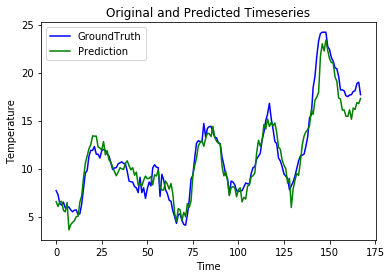

In [43]:
test_ind = 0;
y_gt_vec = y_test[test_ind,:]
y_pred_vec = pred_array[test_ind,:]

# time_index = x_t1_test[test_ind:test_ind + 5, 0:1];
time_index = np.arange(0,168,1)
# print(time_ind)
plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
# plt.ylim(ymin=5)
# plt.ylim(ymax=20)
plt.legend()
plt.title('Original and Predicted Timeseries')

In [36]:
pred_train_set_array = model.predict(x_train)
print pred_train_set_array.shape

(2501L, 168L)


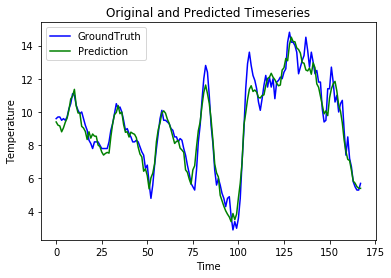

In [41]:
test_ind = 4;
y_gt_vec = y_train[test_ind,:]
y_pred_vec = pred_train_set_array[test_ind,:]

# time_index = x_t1_test[test_ind:test_ind + 5, 0:1];
time_index = np.arange(0,168,1)
# print(time_ind)
plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
# plt.ylim(ymin=5)
# plt.ylim(ymax=20)
plt.legend()
plt.title('Original and Predicted Timeseries')

In [141]:
np.sqrt(sum_of_square(y_gt_vec,y_pred_vec))

27.1852768786834

In [42]:
num_train = x_train.shape[0]
num_test = x_test.shape[0]

print "train = %d test = %d" %( num_train, num_test )

# Calc loss over training set
train_error = 0.0
train_error_hist=[]
for data_instance in range(0,num_train):
    y_gt_vec = y_train[data_instance,:]
    y_pred_vec = pred_train_set_array[data_instance,:]
    sq_err = np.sqrt(sum_of_square(y_gt_vec,y_pred_vec))
    train_error_hist.append(sq_err)
    train_error = train_error + sq_err
print "train_error = %f" %( train_error )

# Calc loss over test set
test_error = 0.0
test_error_hist=[]
for data_instance in range(0,num_test):
    y_gt_vec = y_test[data_instance,:]
    y_pred_vec = pred_array[data_instance,:]
    sq_err = np.sqrt(sum_of_square(y_gt_vec,y_pred_vec))
    test_error_hist.append(sq_err)
    test_error = test_error + sq_err
print "test_error = %f" %( test_error )

    


train = 2501 test = 1335
train_error = 27270.585115
test_error = 79563.745843


In [46]:
model.evaluate(x_test,y_test)

1603/1603 [==============================] - 3s     


54213125.377417341

7362.9562676957412